# Прогноз цены пальмового масла_линейная регрессия_11.03.2024

## Содержание

* [Описание механизма работы моделей](#Механизм)
* [Импорт библиотек Python и загрузка набора данных](#Импорт)
* [Предобработка данных](#Предобработка)
* [Прогнозирование цены пальмового масла](#Прогнозирование)
    * [Подготовка данных](#Прогнозирование_подготовка)
    * [Обучение моделей линейной регрессии](#Обучение)
        * [Обучение методами библиотеки sklearn](#Обучение_sklearn)
        * [Обучение методами библиотеки sklearn и ручная настройка вектора весов](#Обучение_вектор)
        * [Обучение путем ручной настройки градиентного спуска поиска весов модели](#Обучение_спуск)
    * [Оптимизация работы моделей](#Оптимизация)
        * [Оптимизация модели, построенной методами библиотеки sklearn](#Оптимизация_sklearn)
        * [Оптимизация модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Оптимизация_вектор)
        * [Оптимизация модели, построенной на методе градиентного спуска](#Оптимизация_спуск)
    * [Построение прогноза с применением моделей](#Прогноз)
        * [Подготовка данных для прогнозирования](#Прогноз_данные)
        * [Прогноз модели, построенной методами библиотеки sklearn](#Прогноз_sklearn)
        * [Прогноз модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Прогноз_вектор)
        * [Прогноз модели, построенной на методе градиентного спуска](#Прогноз_спуск)
    * [Выгрузка данных](#Выгрузка)

## Описание механизма работы моделей <a class = "anchor" id = "Механизм"></a>

Текущий файл - это рабочая версия моделей линейной регрессии, используемых для прогнозирования цены пальмового масла.

Данный механизм характеризуется следующими параметрами:

1. Исходный набор данных, загружаемый в тетрадь Jupyter Notebook, включает в себя следующие параметры (в скобках указано название параметра в таблице данных):
    * Календарная дата (date)
    * **Соевое масло**_цена в Роттердаме, долл/т (Soybean oil_Rotterdam);
    * **Соевое масло**_цена в Бразилии, долл/т (Soybean oil_Brazil);
    * **Соевое масло**_цена в Аргентине, долл/т (Soybean oil_Argentina);
    * **Соевые бобы**_цена в Бразилии, долл/т (Soybean seed_Brazil);
    * **Рапсовое масло**_цена в Роттердаме, долл/т (Rapeseed oil_Rotterdam);
    * Курс рупий к доллару (Rupees/долл);
    * Курс юаня к доллару (Yuan/долл);
    * Курс евро к доллару (Euro/долл);
    * Курс рубля к доллару (Ruble/долл);
    * Курс ринггита к доллару (Ringgit/долл);
    * Цена нефти марки Brent, долл/т (Oil_Brent);
    * Цена нефти марки Urals. долл/т (Oil_Urals);
    * **Пальмовое масло**_цена сырого, долл/т (Palm oil_crude);
    * **Пальмовое масло**_цена очищенного, долл/т (Palm oil_RBD);
    * **Пальмовое масло**_цена в Аргентине, долл/т (Palm oil_Argentina);
    * Биодизельное топливо_цена в США, долл/т (Biodiesel_USA);
    * Среднесуточная температура в Куала-Лумпур, Малайзия, градусы C (mean_temp);
    * Среднесуточное давление в Куала-Лумпур, Малайзия, Па (mean_pres);
    * Среднесуточная влажность воздуха в Куала-Лумпур, Малайзия, % (mean_humid).


2. **Набор данных, используемый в машинном обучении и дальнейшем прогнозировании цены пальмового масла, включает в себя следующие параметры** (в скобках указано название параметра в таблице данных):
    * Среднесуточная температура в Куала-Лумпур, Малайзия (mean_temp_1);
    * Среднесуточное давление в Куала-Лумпур, Малайзия (mean_pres_2);
    * Среднесуточная влажность воздуха в Куала-Лумпур, Малайзия (mean_humid_1);
    * Курс евро к доллару (euro_8);
    * Курс рубля к доллару (ruble_3);
    * Курс юаня к доллару (yuan_9);
    * Курс рупий к доллару (rupees_2);
    * Курс ринггита к доллару (ringgit_2);
    * Цена нефти марки Brent (oil_brent_6);
    * Цена нефти марки Urals (oil_urals_6);
    * Пальмовое масло_цена очищенного со смещением "1" (palm_oil_1);
    * Пальмовое масло_цена очищенного со смещением "2" (palm_oil_2);
    * Пальмовое масло_цена очищенного со смещением "4" (palm_oil_4).
    
где "наименование_N" - обозначение названия параметра с указанием числа (в днях) смещения значений в ряде данных относительно фактического на заданную дату.
    
3. Прогнозируемая целевая переменная - **Пальмовое масло_цена очищенного, долл/т (palm_oil)**.
4. Метод прогнозирования - **линейная регрессия**.
5. Источники данных:
    * Ценовые показатели и курсы валют - **Информационный терминал Thomson Reuters Eikon**;
    * Погодные показатели - **Информационный ресурс: rp5 - https://rp5.ru/%D0%9F%D0%BE%D0%B3%D0%BE%D0%B4%D0%B0_%D0%B2_%D0%9A%D1%83%D0%B0%D0%BB%D0%B0-%D0%9B%D1%83%D0%BC%D0%BF%D1%83%D1%80%D0%B5**

## Импорт библиотек Python и загрузка набора данных <a class = "anchor" id = "Импорт"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Импорт библиотек для работы с данными табличного вида, машинного обучения и визуализации данных;
2. Инициализация переменной для хранения импортируемого набора - **raw_data**;
3. Инициализация переменной и отбор в нее данных для дальнейшего машинного обучения и прогноза значений - **df**

    где **raw_data** подразумевает хранение "сырых" - первоначальных - данных;
    **df** - сокращенно от "DataFrame" - хранит специально отобранные признаки.

In [7]:
# импорт библиотек для работы с табличными данными и объектами линейной алгебры
import pandas as pd
import numpy as np

# импорт методов работы с датой и временем
from datetime import datetime, timedelta, date

# импорт библиотек для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# импорт методов машинного обучения
# импорт объекта линейной регрессии
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

# импорт метрик оценки качества модели
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

# импорт методов обработки данных и масштабирования значений
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# импорт библиотеки для сохранения данных в формате pickle
import pickle

C:\Users\k.storozhuk\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
linear_v1_history = pd.read_csv("~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/data reports_from jupyter/linear_models_v1.csv")

linear_v1_history = linear_v1_history.iloc[-1, :]

In [9]:
# загрузка набора данных в рабочую среду
raw_data = pd.read_excel("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/datasets/dataset_po modeling.xlsx")
# отобразим состав исходного набора в виде списка названий столбцов и количество строк
print('Перечень названий столбцов исходного набора данных:')
for i in raw_data.columns.to_list():
    print('*', i)
print()
print('Количество строк в исходном наборе данных:', raw_data.shape[0])

Перечень названий столбцов исходного набора данных:
* date
* Soybean oil_Rotterdam
* Soybean oil_Brazil
* Soybean oil_Argentina
* Soybean seed_Brazil
* Rapeseed oil_Rotterdam
* Rupees/$
* Yuan/$
* Euro/$
* Ruble/$
* Ringgit/$
* Oil_Brent
* Oil_Urals
* Palm oil_crude
* Palm oil_RBD
* Palm oil_Argentina
* Biodiesel_USA
* mean_temp
* mean_pres
* mean_humid

Количество строк в исходном наборе данных: 4984


In [10]:
# отберем из исходного набора только необходимые для моделирования столбцы
df = raw_data[['date', 'Rupees/$', 'Yuan/$', 'Euro/$', 'Ruble/$', 'Ringgit/$', 'Oil_Brent',
                 'Oil_Urals', 'Palm oil_RBD', 'mean_temp', 'mean_pres', 'mean_humid']]
# изучим типы данных в столбцах нового набора
df.dtypes

date            datetime64[ns]
Rupees/$               float64
Yuan/$                 float64
Euro/$                 float64
Ruble/$                float64
Ringgit/$              float64
Oil_Brent              float64
Oil_Urals              float64
Palm oil_RBD           float64
mean_temp              float64
mean_pres              float64
mean_humid             float64
dtype: object

## Предобработка данных <a class = "anchor" id = "Предобработка"></a>

Данный блок характеризуется следующими последовательными действиями с переменной **df**:
1. Трансформация заголовков датафрейма - перевод их к одному типу и стилю написания;
2. Фильтрация пустых значений в наборе данных;
3. Добавление в набор данных новых столбцов со смещенными значениями относительно фактических;
4. Повторная фильтрация пустых значений в датафрейме.

По итогам этапа значения в переменной **df** полностью готовы к дальнейшему использованию в машинном обучении.

In [13]:
# приведем названия столбцов к формату 'snake_case'
df.columns = df.columns.str.lower()

# сосчитаем количество пустых значений
df.isna().sum()

date               0
rupees/$           0
yuan/$             0
euro/$             0
ruble/$            0
ringgit/$          0
oil_brent          0
oil_urals          0
palm oil_rbd       1
mean_temp       1106
mean_pres       1106
mean_humid      1106
dtype: int64

In [14]:
# найдем дату последнего пустого значения по столбцу mean_temp
last_isna_date = df[df['mean_temp'].isnull() == True]['date'].to_list()[-1]

# формируем непрерывный набор данных и отсекаем пустые значения
df = df[df['date'] > last_isna_date]

# проверяем датафрейм на пустоты
df.isna().sum()

date            0
rupees/$        0
yuan/$          0
euro/$          0
ruble/$         0
ringgit/$       0
oil_brent       0
oil_urals       0
palm oil_rbd    0
mean_temp       0
mean_pres       0
mean_humid      0
dtype: int64

Добавляем в набор данных столбцы со смещенными значениями.

Для реализации этой идеи будет объявлена функция быстрого конструирования столбцов со смещенными значениями.

In [16]:
# пишем функцию создания столбцов
def shifting_values(series, number):
    df[series + "_" + str(number)] = df[series].shift(number)

In [17]:
# создадим три новых столбца для значений цены пальмового масла - используется столбец palm oil_rbd
for i in [1, 2, 4]:
    shifting_values('palm oil_rbd', i)
    
# создадим столбцы со смещенными значениями для остальных параметров 
shifting_values('rupees/$', 2)
shifting_values('yuan/$', 9)
shifting_values('euro/$', 8)
shifting_values('ruble/$', 3)
shifting_values('ringgit/$', 2)
shifting_values('oil_brent', 6)
shifting_values('oil_urals', 6)
shifting_values('mean_temp', 1)
shifting_values('mean_pres', 2)
shifting_values('mean_humid', 1)

# перезапишем набор данных, отфильтровав пустые значения
df = df[df['date'] > df[df['yuan/$_9'].isna() == True]['date'].to_list()[-1]]
# проверим наличие пропусков
df.isna().sum()

date              0
rupees/$          0
yuan/$            0
euro/$            0
ruble/$           0
ringgit/$         0
oil_brent         0
oil_urals         0
palm oil_rbd      0
mean_temp         0
mean_pres         0
mean_humid        0
palm oil_rbd_1    0
palm oil_rbd_2    0
palm oil_rbd_4    0
rupees/$_2        0
yuan/$_9          0
euro/$_8          0
ruble/$_3         0
ringgit/$_2       0
oil_brent_6       0
oil_urals_6       0
mean_temp_1       0
mean_pres_2       0
mean_humid_1      0
dtype: int64

In [18]:
# текущее количество строк в наборе
print('Количество строк в фрейме данных перед началом моделирования:', df.shape[0])

Количество строк в фрейме данных перед началом моделирования: 3428


## Прогнозирование цены пальмового масла <a class = "anchor" id = "Прогнозирование"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Подготовка данных](#Прогнозирование_подготовка)
2. [Обучение моделей линейной регрессии](#Обучение)
3. [Оптимизация работы моделей](#Оптимизация)
4. [Построение прогноза с помощью моделей](#Прогноз)

Каждый этап так же содержит в себе промежуточные подшаги. Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

### Подготовка данных <a class = "anchor" id = "Прогнозирование_подготовка"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **new_columns_list** для фильтрация заголовков, которые содержат в своем названии постфикс обозначения количества смещения значений;
2. Инициализация переменной **data** для хранения смещенных значений признаков, значений даты и целевой переменной;
3. Разбиение общего набора данных на обучающую и тестовую выборки в соотношении "80/20";
4. Инициализация переменных **X_train, y_train** и **X_test, y_test** для хранения области признаков (переменные с литерой "X") и вектора значений целевой переменной (переменные с литерой "y");
5. Масштабирование значений переменных **X_train** и **X_test** - формирование переменных **X_train_std** и **X_test_std**.

In [23]:
# после последних преобразований необходимо сформировать новый фрейм данных, состоящий из столбцов со смещенными значениями
new_columns_list = []
new_columns_list.extend(['date', 'palm oil_rbd'])

for i in df.columns.to_list():
    try:
        if int(i[-1]) in range(1, 11):
            new_columns_list.append(i)
    except:
        continue

print(new_columns_list)

['date', 'palm oil_rbd', 'palm oil_rbd_1', 'palm oil_rbd_2', 'palm oil_rbd_4', 'rupees/$_2', 'yuan/$_9', 'euro/$_8', 'ruble/$_3', 'ringgit/$_2', 'oil_brent_6', 'oil_urals_6', 'mean_temp_1', 'mean_pres_2', 'mean_humid_1']


In [24]:
# сформируем новый фрейм данных исходя из отобранных столбцов и преобразуем столбец 'date' в индекс набора данных
data = df[new_columns_list].set_index('date')

Следующим шагом выступает формирование обучающего и тестового наборов данных.

После проведенных исследований оптимальным соотношением Обучающей и Тестовой выборок было выбрано соотношение "80/20", где из общего набора данных **80% составляют значения Обучающей выборки** и **20% - значения Тестовой выборки**.

In [26]:
# запишем значения даты в отдельную переменную - объект Series
date_series = pd.Series(data.index)

# разобьем датафрейм на обучающий и тестовый наборы
filter_date = date_series.quantile(0.8)

train_data = data[data.index < filter_date]
test_data = data[data.index >= filter_date]

In [27]:
# формируем список признаков модели. Для этого воспользуемся значениями переменной new_columns_list
new_columns_list.remove('date')
new_columns_list.remove('palm oil_rbd')

# формируем области признаков и вектора значений целевой переменной
X_train = train_data[new_columns_list]
X_test = test_data[new_columns_list]
y_train = train_data['palm oil_rbd']
y_test = test_data['palm oil_rbd']

In [28]:
# инициализируем объект масштабирования в отдельную переменную
mm = MinMaxScaler()

# масштабируем значения областей признаков
X_train_std = mm.fit_transform(X_train)
X_test_std = mm.transform(X_test)

### Обучение моделей линейной регрессии <a class = "anchor" id = "Обучение"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Обучение методами библиотеки sklearn](#Обучение_sklearn)
2. [Обучение методами библиотеки sklearn и ручная настройка вектора весов](#Обучение_вектор)
3. [Обучение путем ручной настройки градиентного спуска поиска весов модели](#Обучение_спуск)

Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

#### Обучение методами библиотеки sklearn <a class = "anchor" id = "Обучение_sklearn"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **reg** для хранения объекта линейной регрессии;
2. Обучение линейной регрессии на значениях переменных **X_train_std** и **y_train**;
3. Получение коэффициентов (весов) для признаков модели и вывод на экран их значений с выделением цветовой подсветкой;

In [33]:
# инициализируем объект линейной регрессии
reg = LinearRegression()

# обучаем линейную регрессию
reg.fit(X_train_std, y_train)

LinearRegression()

In [34]:
# выведем на экран с помощью пользовательской функции коэффициенты, которые модель подобрала для признаков
def cell_color(data):
    if data < -2:
        return 'background-color: skyblue'
    elif data > 2:
        return 'background-color: darksalmon'
    else:
        return 'background-color: white'

In [35]:
# визуализируем веса
df_coef = pd.DataFrame(data = np.array([reg.coef_]), columns = X_train.columns)
df_coef.style.applymap(lambda x: cell_color(x))

,palm oil_rbd_1,palm oil_rbd_2,palm oil_rbd_4,rupees/$_2,yuan/$_9,euro/$_8,ruble/$_3,ringgit/$_2,oil_brent_6,oil_urals_6,mean_temp_1,mean_pres_2,mean_humid_1
0,1565.281662,-15.720692,-14.668810,3.298896,-2.432135,-0.745378,2.652945,1.354305,-24.221407,19.910886,-1.508263,-0.031699,-0.766138


#### Обучение методами библиотеки sklearn и ручная настройка вектора весов <a class = "anchor" id = "Обучение_вектор"></a>

Данный блок характеризуется следующими последовательными действиями:

1. Инициализация переменной **w** (от слова "weights") для хранения вектора весов модели из предыдущего блока.

In [38]:
# инициализация переменной для хранения значений вектора весов
w = np.array([reg.coef_])

# регулировка первого веса вектора
np.put(w, 0, 850)

#### Обучение путем ручной настройки градиентного спуска поиска весов модели <a class = "anchor" id = "Обучение_спуск"></a>

Данный блок характеризуется следующими последовательными действиями:

1. Формирование пользовательских функций **mserror** (для вычисления функции ошибки MSE) и **grad_mserror** (производная функции ошибки MSE для дальнейшего использования в механизме градиентного спуска);
2. Формирование алгоритма градиентного спуска:
    * инициализация стартовой точки - вектор первоначальных коэффициентов со значениями "0";
    * ввод параметров, используемых в градиентном спуске:
        * критерий остановки **eps**;
        * шаг обучения **learning_rate**;
        * количество итераций цикла градиентного спуска **n**;
    * реализация алгоритма градиентного спуска.

In [41]:
# реализация алгоритма градиентного спуска

# функция ошибки MSE
def mserror(X, w, y):
    y_pred = X @ w
    return np.sum((y - y_pred)**2 ) / len(y_pred)

# функция градиентного спуска
def grad_mseerror(X, w, y):
    y_pred = X @ w
    return 2/len(X) * (y - y_pred) @ (-X)

In [42]:
# инициализация вектора весов
weights = np.zeros(X_train.shape[1])

# ввод критерия остановки
eps = 10**-3
# ввод шага обучения
learning_rate = 0.32
# количество итераций
n = 10**5

# ввод переменной, которая будет участвовать в цикле перебора весов модели
next_weights = weights

# цикл градиентного спуска
for i in range(n):
    cur_weights = next_weights
    next_weights = cur_weights - learning_rate * grad_mseerror(X_train_std, cur_weights, y_train)
    if np.linalg.norm(cur_weights - next_weights, ord = 2) <= eps:
        break

### Оптимизация работы моделей <a class = "anchor" id = "Оптимизация"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Оптимизация модели, построенной методами библиотеки sklearn](#Оптимизация_sklearn)
2. [Оптимизация модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Оптимизация_вектор)
3. [Оптимизация модели, построенной на методе градиентного спуска](#Оптимизация_спуск)

Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

#### Оптимизация модели, построенной методами библиотеки sklearn <a class = "anchor" id = "Оптимизация_sklearn"></a>

In [46]:
# # указываем название файла хранения модели линейной регрессии
# filename = 'linear_sklearn_model_v1.sav'
# 
# # загружаем модель в рабочую среду Jupyter Notebook
# reg = pickle.load(open(filename, 'rb'))

Данный блок характеризуется следующими последовательными действиями:
1. Дополнительное обучение объекта линейной регрессии (переменная **clf**) на тестовых данных (переменные **X_test_std** и **y_test**);
2. Инициализация переменной **df_coef_opt** для хранения обновленных значений весов для признаков модели;
3. Инициализация переменной **y_t_pr_sk** для хранения прогноза модели на тестовых данных. Формирование столбца индекса на основании индексов переменной **y_test**;
4. Построение графиков значений прогноза модели и фактических значений тестовых данных;

In [48]:
# дообучаем линейную регрессию на тестовых данных
reg.fit(X_test_std, y_test)

LinearRegression()

In [49]:
# визуализируем обновленные веса
df_coef_opt = pd.DataFrame(data = np.array([reg.coef_]), columns = X_train.columns)
df_coef_opt.style.applymap(lambda x: cell_color(x))

,palm oil_rbd_1,palm oil_rbd_2,palm oil_rbd_4,rupees/$_2,yuan/$_9,euro/$_8,ruble/$_3,ringgit/$_2,oil_brent_6,oil_urals_6,mean_temp_1,mean_pres_2,mean_humid_1
0,1565.024652,-134.114484,63.772000,3.806207,-3.673925,-3.977811,-6.204970,-2.596937,-21.009829,16.524346,-7.609942,1.491002,-4.322183


In [50]:
# получаем предсказания (ответы) алгоритма
y_t_pr_sk = pd.DataFrame(reg.predict(X_test_std))

# формируем индексы для новых наборов данных
y_t_pr_sk.index = y_test.index.date

# добавляем названия
y_t_pr_sk = y_t_pr_sk.rename(columns = {0: 'sklearn_values'})

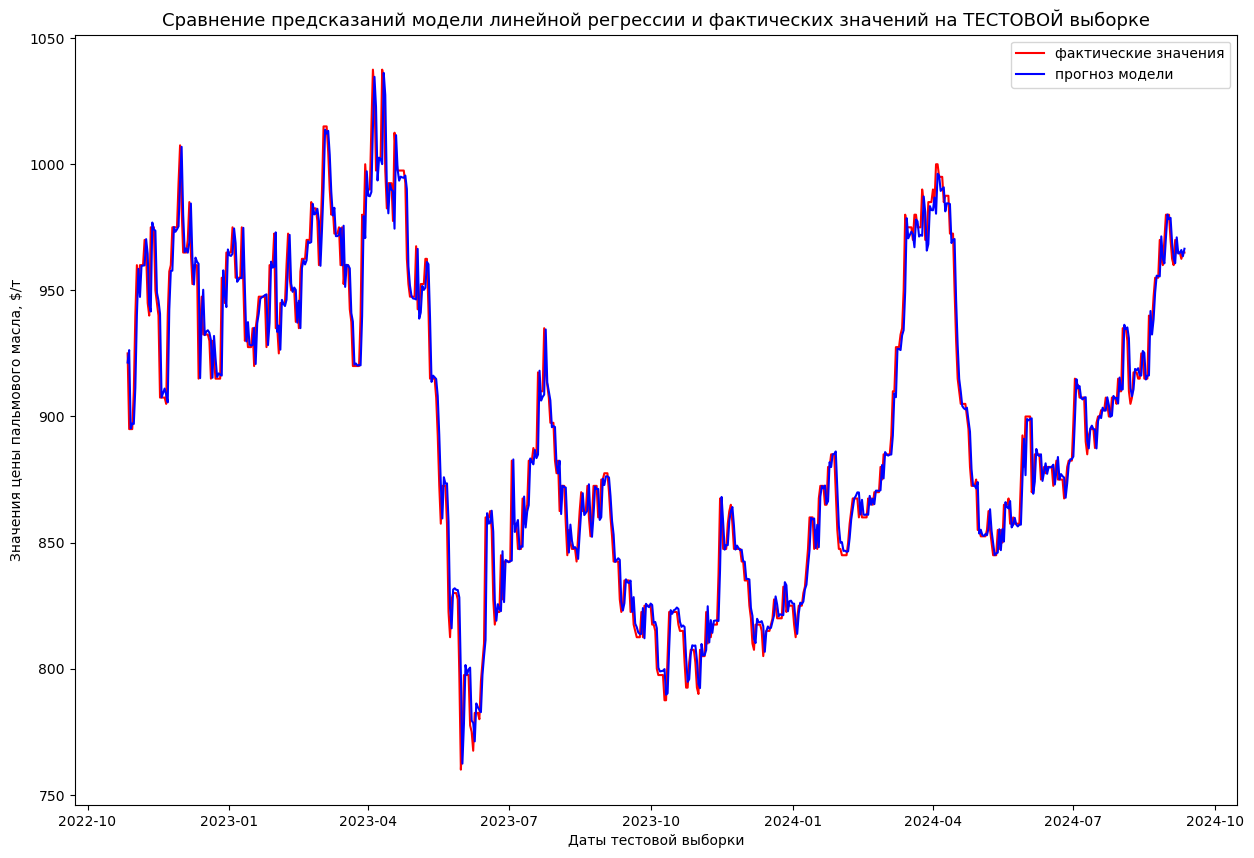

In [51]:
# визуализируем предсказания для тестовой выборки на графике
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'фактические значения')
plt.plot(y_t_pr_sk, color = 'blue', label = 'прогноз модели')
plt.title('Сравнение предсказаний модели линейной регрессии и фактических значений на ТЕСТОВОЙ выборке', fontsize = 13)
plt.xlabel('Даты тестовой выборки')
plt.ylabel('Значения цены пальмового масла, $/т')
plt.legend()
plt.show()

#### Оптимизация модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов <a class = "anchor" id = "Оптимизация_вектор"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **y_t_pr_arr** для хранения прогноза модели на тестовых данных. Формирование столбца индекса на основании индексов переменной **y_test**;
2. Построение графиков значений прогноза модели и фактических значений тестовых данных;

In [54]:
# импорт массива с ручной настройкой весов

# w = np.loadtxt('array_weights_v1.txt', dtype = float)

In [55]:
# получим предсказания с применением методов линейной алгебры
y_t_pr_arr = pd.DataFrame(np.dot(X_test_std, w.T))

# формируем индексы для новых наборов данных
y_t_pr_arr.index = y_test.index.date

# добавляем названия
y_t_pr_arr = y_t_pr_arr.rename(columns = {0: 'array_values'})

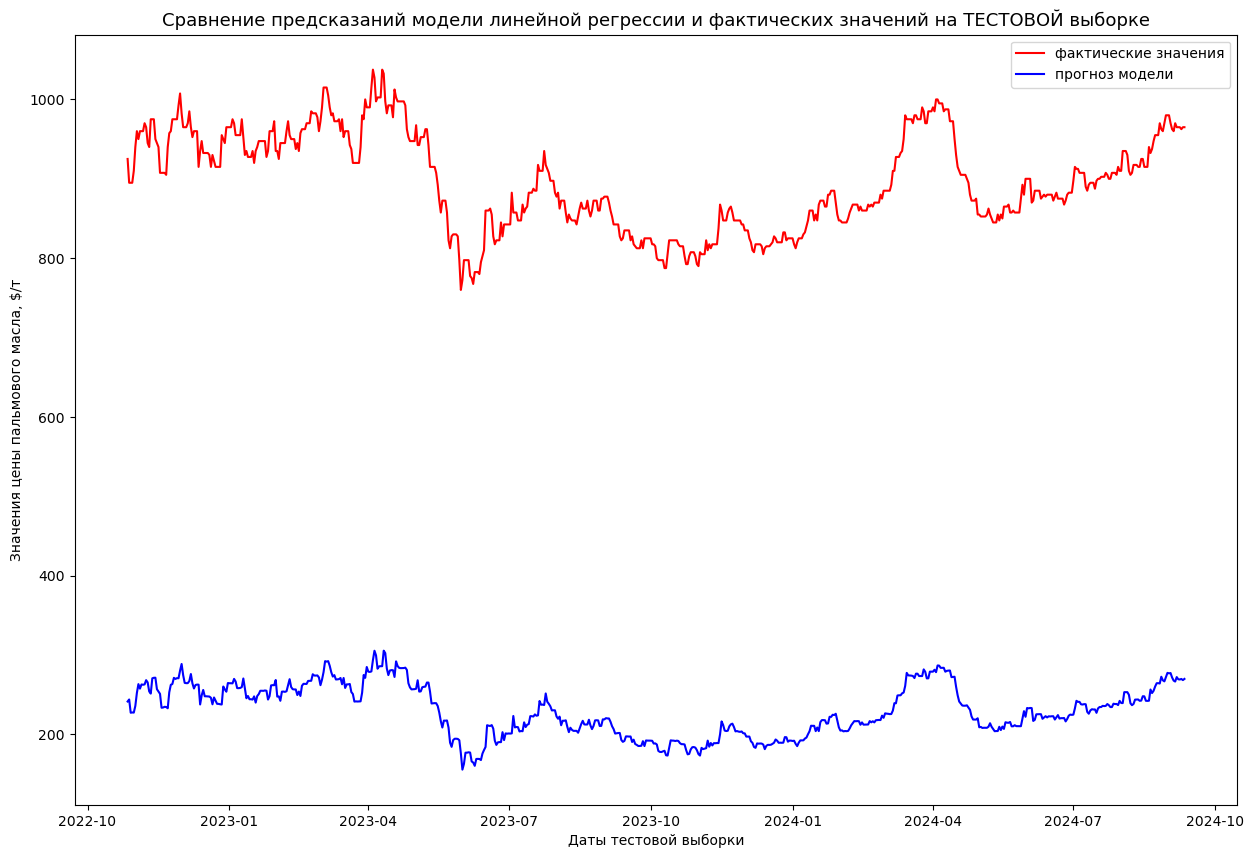

In [56]:
# визуализируем предсказания для тестовой выборки на графике
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'фактические значения')
plt.plot(y_t_pr_arr, color = 'blue', label = 'прогноз модели')
plt.title('Сравнение предсказаний модели линейной регрессии и фактических значений на ТЕСТОВОЙ выборке', fontsize = 13)
plt.xlabel('Даты тестовой выборки')
plt.ylabel('Значения цены пальмового масла, $/т')
plt.legend()
plt.show()

#### Оптимизация модели, построенной на методе градиентного спуска <a class = "anchor" id = "Оптимизация_спуск"></a>

Данный блок характеризуется следующими последовательными действиями:
1. Инициализация переменной **weights_opt**, которой присваиваются предыдущие значения весов для признаков модели;
2. Реализация градиентного спуска, где в качестве стартовой точки выбраны значения весов, хранящиеся в переменной **weights_opt**;
3. Расчет прогнозных значений путем скалярного произведения вектора весов **next_weights** и матрицы признаков **X_test_std**. Инициализация переменной **y_t_pr_dc** для хранения прогноза модели на тестовых данных. Формирование столбца индексов на основании индексов переменной **y_test**;
4. Визуализация графиков прогнозных значений модели и фактических значений тестовых данных;

In [59]:
# импорт весов модели градиентного спуска

# next_weights = np.loadtxt('gradient_descent_v1.txt', dtype = float)

In [60]:
# записываем текущие веса в новую переменную
weights_opt = next_weights

In [61]:
# ввод критерия остановки для нового спуска
eps_opt = 10**-3
# ввод шага обучения
learning_rate_opt = 0.1
# количество итераций
n_opt = 10**5

# цикл градиентного спуска
for i in range(n_opt):
    cur_weights = weights_opt
    next_weights = cur_weights - learning_rate_opt * grad_mseerror(X_test_std, cur_weights, y_test)
    if np.linalg.norm(cur_weights - next_weights, ord = 2) <= eps_opt:
        break

In [62]:
# рассчитываем предсказания для валидационных данных
y_t_pr_dc = pd.DataFrame(X_test_std @ next_weights)

# формируем индексы
y_t_pr_dc.index = y_test.index.date

# добавляем названия
y_t_pr_dc = y_t_pr_dc.rename(columns = {0: 'descent_values'})

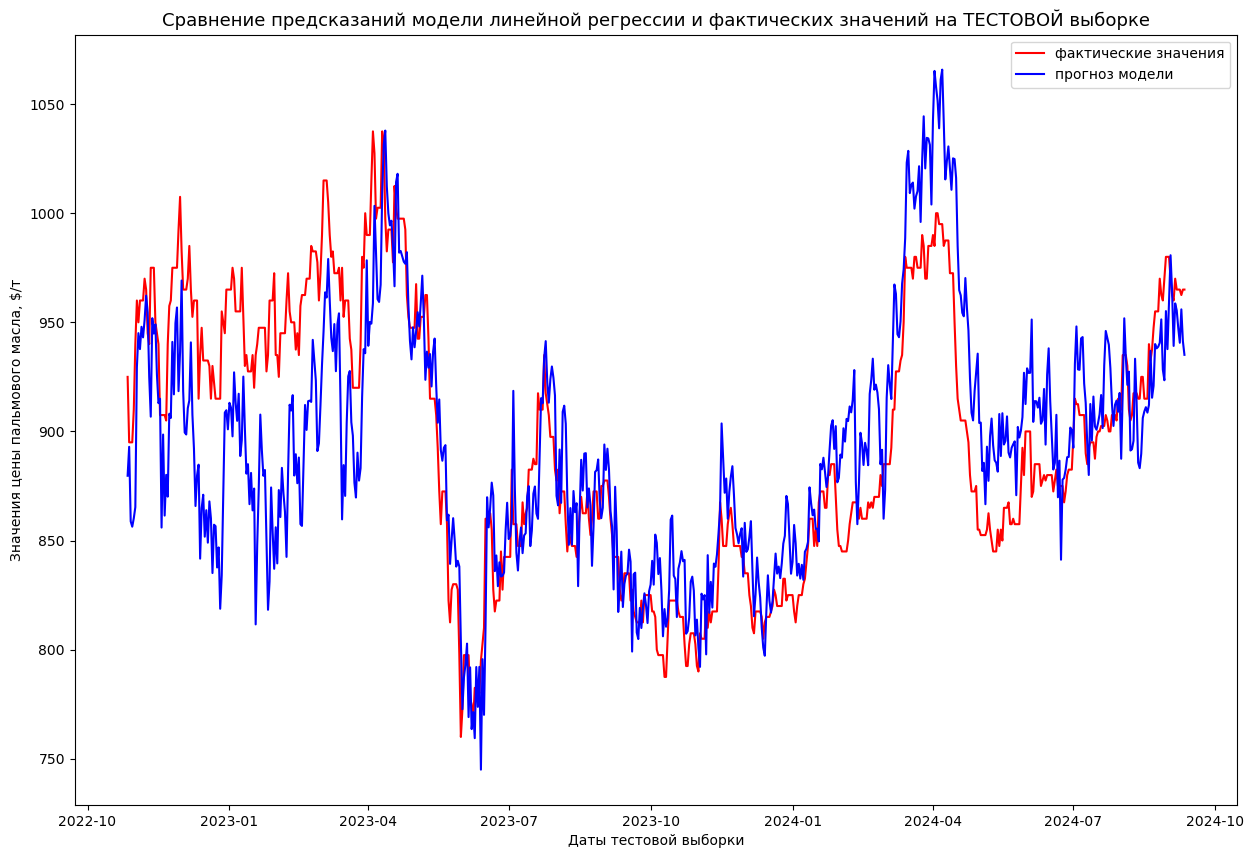

In [63]:
# визуализируем предсказания для тестовой выборки на графике
plt.figure(figsize = (15, 10))
plt.plot(y_test, color = 'red', label = 'фактические значения')
plt.plot(y_t_pr_dc, color = 'blue', label = 'прогноз модели')
plt.title('Сравнение предсказаний модели линейной регрессии и фактических значений на ТЕСТОВОЙ выборке', fontsize = 13)
plt.xlabel('Даты тестовой выборки')
plt.ylabel('Значения цены пальмового масла, $/т')
plt.legend()
plt.show()

### Построение прогноза с помощью моделей <a class = "anchor" id = "Прогноз"></a>

Данный блок содержит в себе несколько промежуточных этапов:
1. [Подготовка данных для прогнозирования](#Прогноз_данные)
2. [Прогноз модели, построенной методами библиотеки sklearn](#Прогноз_sklearn)
3. [Прогноз модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов](#Прогноз_вектор)
4. [Прогноз модели, построенной на методе градиентного спуска](#Прогноз_спуск)

Расшифровка действий, производимых на каждом этапе, будет приведена в начале каждого блока.

#### Подготовка данных для прогнозирования <a class = "anchor" id = "Прогноз_данные"></a>

Необходимо сформировать список значений для будущей даты, на которую будем выполнять прогноз.

Список будет формироваться в переменной: **values_list**.

В дальнейшем список будет преобразован в вектор данных, и будет выполнено скалярное произведение значений вектора на вектор весов.

Для полученного значения цены будет присвоен индекс будущей даты, а само значение будет отображено на графике.

Для начала вернемся к исходному набору данных, который хранится в переменной **df**.

Необходимо масштабировать значения, хранящиеся в данном наборе для адекватного расчета прогноза.

In [69]:
# формируем столбец "date" в исходном наборе данных как столбец индекса
df = df.set_index('date')

# масштабируем значения подготовленного фрейма
df = pd.DataFrame(data = mm.fit_transform(df), columns = df.columns)

In [70]:
# формируем список названий столбцов в текущем наборе данных со смещенными значениями
columns_list = data.columns.to_list()

# список, где будут храниться значения для дальнейшего прогноза
values_list = []

# цикл для извлечения наименования признака и числа смещения значений
for i in columns_list:
    try:
        number = int(i[-1])
        feature = i[:-2]
        
        values_list.append(df[feature].values[-number])
        
    except:
        continue

In [71]:
# преобразуем список в массив numpy
values_array = np.array(values_list)

#### Прогноз модели, построенной методами библиотеки sklearn <a class = "anchor" id = "Прогноз_sklearn"></a>

In [73]:
# воспользуемся методом predict объекта линейной регрессии для прогнозирования значений
pr_sk = reg.predict(values_array.reshape(1, -1))

# сформируем прогноз в виде датафрейма
pr_sk = pd.DataFrame({'sklearn_values': pr_sk,
                               'date': max(data.index.date) + timedelta(days = 1)})

# формируем индекс с прибавлением 1 дня к самой последней дате набора
pr_sk = pr_sk.set_index('date')

# выведем результат на экран
display(pr_sk)

,sklearn_values
date,
2024-09-12,968.697806


#### Прогноз модели, построенной методами библиотеки sklearn с ручной настройкой вектора весов <a class = "anchor" id = "Прогноз_вектор"></a>

In [75]:
# сохраняем прогноз в новую переменную, которую трансформируем в датафрейм
pr_arr = pd.DataFrame({'array_values': [values_array @ w.T],
                             'date': max(data.index.date) + timedelta(days = 1)})

# формируем индекс с прибавлением 1 дня к самой последней дате набора
pr_arr = pr_arr.set_index('date')

# выведем результат на экран
display(pr_arr)

,array_values
date,
2024-09-12,[272.3376464245432]


#### Прогноз модели, построенной на методе градиентного спуска <a class = "anchor" id = "Прогноз_спуск"></a>

In [77]:
# сохраняем прогноз в новую переменную, которую трансформируем в датафрейм
pr_dc = pd.DataFrame({'descent_values': [values_array @ next_weights],
                               'date': max(data.index.date) + timedelta(days = 1)})

# формируем индекс с прибавлением 1 дня к самой последней дате набора
pr_dc = pr_dc.set_index('date')

# выведем результат на экран
display(pr_dc)

,descent_values
date,
2024-09-12,932.271238


## Выгрузка данных <a class = "anchor" id = "Выгрузка"></a>

На текущем этапе выполняются финальные действия по экспорту данных из рабочей тетради Jupyter в готовый набор для дальнейшего использования в отслеживании показателей модели.

По ходу действия выполняются следующие шаги:
1. Расчет значения целевой переменной для данных обучающей выборки с использованием трех веток моделей: инициализация переменных **y_pred_train_sk**, **y_pred_train_ln**, **y_pred_train_dc**;
2. Объявление функции **concat_data** для соединения трех переменных (значения **y** обучающей и тестовой выборок, а также - новая прогнозная точка данных);
3. Применение функции и объединение данных;
4. Объединение фреймов в один общий набор - создание новой переменной **joined_data** для хранения значений;
5. Загрузка предыдущего фрейма с прогнозами модели - объединение новых и старых данных;
6. Выгрузка финального набора;
7. Сохранение параметров модели из данной тетради Jupyter Notebook.

In [80]:
# расчитываем значения цены пальмового масла для обучающей выборки методами sklearn
y_tr_pr_sk = pd.DataFrame({'sklearn_values' : reg.predict(X_train_std),
                                'date': X_train.index.date})
y_tr_pr_sk = y_tr_pr_sk.set_index('date')

# расчитываем значения цены пальмового масла для обучающей выборки методом ручной настройки весов
y_tr_pr_arr = pd.DataFrame(data = X_train_std @ w.T,
                                index = X_train.index.date)
y_tr_pr_arr = y_tr_pr_arr.rename(columns = {0: 'array_values'})

# расчитываем значения цены пальмового масла для обучающей выборки методом градиентного спуска
y_tr_pr_dc = pd.DataFrame({'descent_values': X_train_std @ next_weights.T,
                               'date': X_train.index.date})
y_tr_pr_dc = y_tr_pr_dc.set_index('date')

In [81]:
# объявление функции соединения фреймов данных
def concat_data(train_frame, test_frame, new_point):
    frames = [train_frame, test_frame, new_point]
    return pd.concat(frames)

In [82]:
# объединяем фреймы данных по вертикали
sk_data = concat_data(y_tr_pr_sk, y_t_pr_sk, pr_sk)
arr_data = concat_data(y_tr_pr_arr, y_t_pr_arr, pr_arr)
dc_data = concat_data(y_tr_pr_dc, y_t_pr_dc, pr_dc)

In [83]:
# объединим предсказания в один датафрейм
jn_sklearn_descent = sk_data.join(dc_data)
full_data = jn_sklearn_descent.join(arr_data)

# отобразим результат на экране
display(full_data)

,sklearn_values,descent_values,array_values
2015-04-25,642.811277,518.401743,87.163326
2015-04-26,642.714605,514.331002,86.968786
2015-04-27,641.537042,543.985917,86.852295
2015-04-28,632.078870,517.423862,81.376699
2015-04-29,630.149867,537.344800,79.936543
...,...,...,...
2024-09-08,964.871178,940.624256,269.276108
2024-09-09,965.992762,955.933691,269.930441
2024-09-10,963.515234,941.325027,268.50761
2024-09-11,966.498563,935.097679,269.991386


In [84]:
# объединение прогнозов в один датафрейм
pred_point = pr_sk.join(pr_arr).join(pr_dc)

# импорт исторических значений
# linear_v1_history = pd.read_csv("~/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/prediction history/linear_v1_history.csv")

# добавление новой прогнозной точки в историю прогнозов
linear_v1_history = pd.concat([linear_v1_history, pred_point])

# сохранение обновленной истории на ПК
linear_v1_history.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/prediction history/linear_v1_history.csv")

In [85]:
# записываем точку данных с текущими параметрами модели SKLEARN
sklearn_point = pd.DataFrame(data = np.array([reg.coef_]), columns = X_train.columns)

# формируем столбцы для хранения значений даты и функций ошибок
sklearn_point = sklearn_point.assign(
    date = date.today(),
    mae = mean_absolute_error(reg.predict(X_test_std), y_test),
    rmse = np.sqrt(mean_squared_error(reg.predict(X_test_std), y_test)),
    mape = mean_absolute_percentage_error(reg.predict(X_test_std), y_test))

# импорт исторических значений параметров модели
sklearn_params_v1 = pd.read_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/sklearn_params_v1.csv")

# добавление новой точки с параметрами модели
sklearn_params_v1 = pd.concat([sklearn_params_v1, sklearn_point])

# сохранение обновленного набора данных на ПК
sklearn_params_v1.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/sklearn_params_v1.csv")

In [86]:
# записываем точку данных с текущими параметрами модели градиентного спуска
descent_point = pd.DataFrame(data = [next_weights], columns = X_test.columns)

descent_point = descent_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_t_pr_dc, y_test),
    rmse = np.sqrt(mean_squared_error(y_t_pr_dc, y_test)),
    mape = mean_absolute_percentage_error(y_t_pr_dc, y_test))

gradient_descent_params_v1 = pd.read_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/gradient_descent_params_v1.csv")

gradient_descent_params_v1 = pd.concat([gradient_descent_params_v1, descent_point])

gradient_descent_params_v1.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/gradient_descent_params_v1.csv")

In [87]:
# записываем точку данных с текущими параметрами модели градиентного спуска
array_point = pd.DataFrame(data = w, columns = X_test.columns)

array_point = array_point.assign(
    date = date.today(),
    mae = mean_absolute_error(y_t_pr_arr, y_test),
    rmse = np.sqrt(mean_squared_error(y_t_pr_arr, y_test)),
    mape = mean_absolute_percentage_error(y_t_pr_arr, y_test))

array_params_v1 = pd.read_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/array_params_v1.csv")

array_params_v1 = pd.concat([array_params_v1, array_point])

array_params_v1.to_csv("C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/models_params/array_params_v1.csv")

In [88]:
# сохраняем фрейм на ПК
full_data.to_csv('C:/Users/k.storozhuk/Desktop/МОИ РАБОТЫ/85. Построение модели прогнозирования цены пальмового масла_новая версия/data reports_from jupyter/linear_models_v1.csv')

In [89]:
# сохранение моделей и их параметров

# сохраняем модель линейной регрессии, обученной методами sklearn
filename = 'linear_sklearn_model_v1.sav'
pickle.dump(reg, open(filename, 'wb'))

# сохраняем веса, полученные на градиентном спуска
np.savetxt('gradient_descent_v1.txt', next_weights)

# сохраняем корректируемые веса
np.savetxt('array_weights_v1.txt', w)